## Check available ATL03 files over Ross Sea

#### Check available ATL03 files in ICESat-2 server (Ross Sea)

In [20]:
## Check available ATL03 data over Ross Sea and convert to csv files

import os, sys
import h5py
from glob import glob
import numpy as np
import shutil
import matplotlib.pyplot as plt
import scipy.signal
import datetime as dt
import pandas as pd
import netCDF4
import time

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2

from readers.get_ATL10 import get_ATL10data
from readers.getATL07 import get_ATL07

region = "Amundsen"
data_dir='F:\\IS2_floes\\ATL10\\' + region
lst = os.listdir(data_dir)
lst = sorted(lst)

import geopandas
from shapely.geometry import Point
import time
import shapefile

def read_shapefile(shp_path):   

    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    # shps = [s.points for s in sf.shapes()]
    shps = [s.points for s in sf.shapes()]
    X = []
    Y = []
    
    for p in shps:
        X.append(p[0][0])
        Y.append(p[0][1])

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)

    return df.reset_index(drop = True)

# Function to convert pandas dataframe to ESRI shapefile
def convertshp(df, outfile):
    '''
    === input
        - df: input pandas dataframe
        - outfile: the nampe of the output shapefile
    '''   

    df=df.reset_index(drop=True)

    if len(df) > 0:
        df['geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)
        collist = list(df.columns)
        if 'time' in collist:
            collist.remove('time')
        df2 = df[collist]

        df2 = geopandas.GeoDataFrame(df2, geometry='geometry')

        # proj WGS84
        df2.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

        df2.to_file(outfile, driver='ESRI Shapefile')

    print('... converted to ' + outfile)

first = True
print("READY TO GO")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
READY TO GO


In [9]:
# Copy & paste ATL10 files only for selected
csvfile = "F:\\IS2_floes\\Overlapped_ATL10_S2_{0}_2018-09-01_2022-03-31.csv".format(region)
filelist = pd.read_csv(csvfile, index_col = 0)

imglist = sorted(glob("F:\\IS2_floes\\S2\\{0}\\*.tif".format(region)))
atl_list = []

for img in imglist:
    imgname = "COPERNICUS/S2_SR/" + os.path.basename(img)[:-4]
    k = np.where(filelist["S1_id"] == imgname)[0][0]
    
    atl_name = data_dir + "\\" + filelist["IS2_file"][k]
    
    if atl_name not in atl_list:
        atl_list.append(atl_name)
        
for atl_name in atl_list:
#     dL = get_ATL10data(atl_name, 1000, bbox=None, beamlist=None)
    print(atl_name)
    
    dest = "F:\\IS2_floes\\ATL10_filtered\\{0}\\".format(region)
    shutil.copy(atl_name, dest)


F:\IS2_floes\ATL07\Weddell\ATL07-02_20190118140102_03230201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190118140102_03230201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190123115254_03980201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190126134435_04450201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190126134435_04450201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190126134435_04450201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190127131857_04600201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190130133619_05060201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190130133619_05060201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190131131040_05210201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190131131040_05210201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190131131040_05210201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190201124501_05360201_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20190203115343_05660201_005_01.h5
F:\IS2_floes\ATL07\W

F:\IS2_floes\ATL07\Weddell\ATL07-02_20220107085847_02461401_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20220107085847_02461401_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20220107085847_02461401_005_01.h5
F:\IS2_floes\ATL07\Weddell\ATL07-02_20220107085847_02461401_005_01.h5


In [21]:
# Copy & paste ATL07 files only for selected
csvfile = "F:\\IS2_floes\\Overlapped_ATL10_S2_{0}_2018-09-01_2022-03-31.csv".format(region)
filelist = pd.read_csv(csvfile, index_col = 0)

list10 = sorted(glob("F:\\IS2_floes\\ATL10_filtered\\{0}\\*.h5".format(region)))
list07 = []

data_dir='F:\\IS2_floes\\ATL07\\' + region

for img in list10:
    name10 = os.path.basename(img)    
    name07 = data_dir + "\\" + name10.replace("ATL10", "ATL07").replace("_02.h5", "_01.h5")
    
    if atl_name not in list07:
        list07.append(name07)
        
for atl_name in list07:
    print(atl_name)
    
    dest = "F:\\IS2_floes\\ATL07_filtered\\{0}\\".format(region)
    shutil.copy(atl_name, dest)

F:\IS2_floes\ATL07\Amundsen\ATL07-02_20210207163813_06981001_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20210303172232_10651001_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20210319151454_13081001_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20210320144915_13231001_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211028185428_05551301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211030180310_05851301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211110162934_07521301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211112184652_07841301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211130154755_10571301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211201152216_10721301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211202145637_10871301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211203160514_11031301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211214143139_12701301_005_01.h5
F:\IS2_floes\ATL07\Amundsen\ATL07-02_20211215140600_12851301_005_01.h5
F:\IS2

In [14]:
atl_name

'ATL07-02_20190301114641_09630201_005_01.h5'

In [20]:
# Create a filtered csv file
csvfile = "F:\\IS2_floes\\Overlapped_ATL10_S2_{0}_2018-09-01_2022-03-31.csv".format(region)
filelist = pd.read_csv(csvfile, index_col = 0)

filtered = pd.DataFrame()

imglist = sorted(glob("F:\\IS2_floes\\S2\\{0}\\*.tif".format(region)))
atl_list = []

for img in imglist:
    imgname = "COPERNICUS/S2_SR/" + os.path.basename(img)[:-4]
    k = np.where(filelist["S1_id"] == imgname)[0][0]
    
    filtered = filtered.append(filelist.loc[k, :]).reset_index(drop = True)

filtered.to_csv("F:\\IS2_floes\\Overlapped_ATL10_S2_{0}_2018-09-01_2022-03-31_filtered.csv".format(region)) 


In [98]:
import geopandas
from shapely.geometry import Point
import time
import shapefile

def read_shapefile(shp_path):   

    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    # shps = [s.points for s in sf.shapes()]
    shps = [s.points for s in sf.shapes()]
    X = []
    Y = []
    
    for p in shps:
        X.append(p[0][0])
        Y.append(p[0][1])

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)

    return df.reset_index(drop = True)

# Function to convert pandas dataframe to ESRI shapefile
def convertshp(df, outfile):
    '''
    === input
        - df: input pandas dataframe
        - outfile: the nampe of the output shapefile
    '''   

    df=df.reset_index(drop=True)

    if len(df) > 0:
        df['geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)
        collist = list(df.columns)
        if 'time' in collist:
            collist.remove('time')
        df2 = df[collist]

        df2 = geopandas.GeoDataFrame(df2, geometry='geometry')

        # proj WGS84
        df2.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

        df2.to_file(outfile, driver='ESRI Shapefile')

    print('... converted to ' + outfile)


In [118]:
# Read ATL03 file and convert for every valid files ============================

for year in [2018, 2019, 2020]:
    csvlist = sorted(glob("F:\\ATL03\\ATL07\\RossSea\\ATL07_S2_{0}*.csv".format(year)))
    df = pd.read_csv(csvlist[0])
    files = df['IS2_file'].unique()

    bbox = [170, -78, -140, -70] # Ross Sea
    # bounding_box = [ll_lon, ll_lat, ur_lon, ur_lat]

    for file in files[0:]:
        
        filename = data_dir + "\\" + file
        
        if os.path.exists(filename):
            print(filename)
            first = True
            
            t1 = time.time()
            
            for beam_number in [0, 2, 4]:
                
                df07 = get_ATL07(filename, beam_number, bbox)

                if len(df07) > 100:
                    beam = df07['beam'][0]
                    
                    if first:
                        df = df07
                        first = False
                    else:
                        df = df.append(df07).reset_index(drop=True)
            
            # convert ATL07 dataframe to shpfile
            shppath = "F:\\ATL03\\ATL07\\RossSea\\shpfile\\"
            shpfile = shppath + file.replace('processed_', '').replace('_004_01.h5', '.shp')
            convertshp(df, shpfile)
            
            # If there is any labeled data, the labeled data is also updated.
            # Can be used in case that some variables should be added to the shpfile from the raw h5 file
            label_path = "F:\\ATL03\\ATL07_train\\labeled_shp\\"
            for surface in ["ice", "thin", "water"]:           
                label_file = file.replace("_004_01.h5", "_{0}.shp".format(surface))
                if os.path.exists(label_path + label_file):
                    ldf = read_shapefile(label_path + label_file)
                    ldf2 = df[df['lat'].isin(ldf['lat']) & df['lon'].isin(ldf['lon'])].reset_index(drop = True)
                    convertshp(ldf2, "F:\\ATL03\\ATL07_train\\" + label_file)
                    print(label_file, len(ldf), len(ldf2))

            # save ATL07 dataframe as csvfile
            csvpath = "F:\\ATL03\\ATL07\\RossSea\\csv\\"
            csvfile = csvpath + file.replace('processed_', '').replace('_004_01.h5', '.csv')
            df.to_csv(csvfile)
            
            t2 = time.time()
            print("... ATL07 file was read (%.3f s)"%(t2-t1))
                        
        else:
            print("No file: {0}".format(file))

        print("==================================================================")
    print("======================= FINISH ===================================")

F:\ATL03\ATL07\RossSea\h5\ATL07-02_20190201190211_05400201_004_01.h5
... converted to F:\ATL03\ATL07\RossSea\shpfile\ATL07-02_20190201190211_05400201.shp
... converted to F:\ATL03\ATL07_train\ATL07-02_20190201190211_05400201_ice.shp
ATL07-02_20190201190211_05400201_ice.shp 1624 1624
... converted to F:\ATL03\ATL07_train\ATL07-02_20190201190211_05400201_water.shp
ATL07-02_20190201190211_05400201_water.shp 1004 1004
... ATL07 file was read (42.857 s)
F:\ATL03\ATL07\RossSea\h5\ATL07-02_20190216185428_07690201_004_01.h5
... converted to F:\ATL03\ATL07\RossSea\shpfile\ATL07-02_20190216185428_07690201.shp
... ATL07 file was read (63.960 s)
F:\ATL03\ATL07\RossSea\h5\ATL07-02_20190301180351_09670201_004_01.h5
... converted to F:\ATL03\ATL07\RossSea\shpfile\ATL07-02_20190301180351_09670201.shp
... ATL07 file was read (47.776 s)
F:\ATL03\ATL07\RossSea\h5\ATL07-02_20190309192128_10900201_004_01.h5
... converted to F:\ATL03\ATL07\RossSea\shpfile\ATL07-02_20190309192128_10900201.shp
... ATL07 file 

... ATL07 file was read (35.215 s)
F:\ATL03\ATL07\RossSea\h5\ATL07-02_20191104185303_05940501_004_01.h5
... converted to F:\ATL03\ATL07\RossSea\shpfile\ATL07-02_20191104185303_05940501.shp
... ATL07 file was read (102.736 s)
F:\ATL03\ATL07\RossSea\h5\ATL07-02_20191106180144_06240501_004_01.h5
... converted to F:\ATL03\ATL07\RossSea\shpfile\ATL07-02_20191106180144_06240501.shp
... converted to F:\ATL03\ATL07_train\ATL07-02_20191106180144_06240501_ice.shp
ATL07-02_20191106180144_06240501_ice.shp 8499 8499
... converted to F:\ATL03\ATL07_train\ATL07-02_20191106180144_06240501_thin.shp
ATL07-02_20191106180144_06240501_thin.shp 6229 6229
... converted to F:\ATL03\ATL07_train\ATL07-02_20191106180144_06240501_water.shp
ATL07-02_20191106180144_06240501_water.shp 337 337
... ATL07 file was read (93.040 s)
F:\ATL03\ATL07\RossSea\h5\ATL07-02_20191107191022_06400501_004_01.h5
... converted to F:\ATL03\ATL07\RossSea\shpfile\ATL07-02_20191107191022_06400501.shp
... ATL07 file was read (198.051 s)
F:

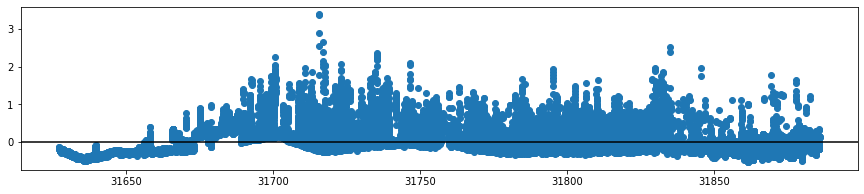

In [93]:
plt.figure(figsize = (15,3))
plt.scatter(df07['x']/1000, df07['height'])
plt.axhline(y=0, color = "k")

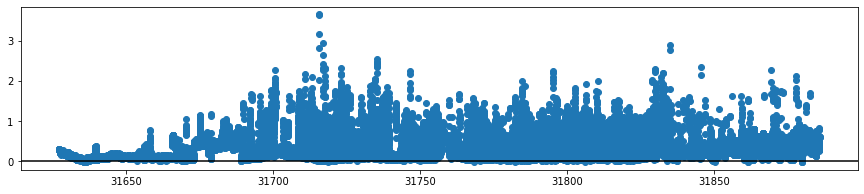

In [94]:
plt.figure(figsize = (15,3))
plt.scatter(df07['x']/1000, df07['h_norm'])
plt.axhline(y=0, color = "k")

In [ ]:
# Read ATL03 file and convert for every valid files ============================

for year in [2019]:
    csvlist = sorted(glob("F:\\ATL03\\ATL03\\RossSea\\ATL03_S2_{0}*.csv".format(year)))
    df = pd.read_csv(csvlist[0])
    files = df['ATL03_file'].unique()

    bbox = [170, -78, -140, -70] # Ross Sea
    # bounding_box = [ll_lon, ll_lat, ur_lon, ur_lat]

    for file in files[:]:
        
        filename = data_dir + "\\" + file

        if os.path.exists(filename):
            print(filename)

            for beam_number in [0, 2, 4]:
                t1 = time.time()
                df03 = getATL03(filename, beam_number, bbox)
                t2 = time.time()
                print("... ATL03 file was read (%.3f s)"%(t2-t1))

                if len(df03) > 100:
                    beam = df03['beam'][0]

                    stats = ['mean', 'sd', 'med'] # calculated statistical parameters
                    variables = ['height', 'pcnt', 'pcnth', 'bcnt', 'brate'] # calculated variables
                    df_sam1 = sampling_ATL03(df03, stats, variables)
                    t2 = time.time()
                    print("... ATL03 file was resampled (%.3f s)"%(t2-t1))

                    if len(df_sam1) > 100:
                        # the sampling process is done based on high-confidence photons (conf >= 3)

                        # First photon bias correction
                        correction = fpb_correction(filename, beam, df_sam1['pcnt_mean'])
                        df_sam1['fpb_corr'] = correction
                        t2 = time.time()
                        print("... First photon bias correction (%.3f s)"%(t2-t1))

                        # Add MSS
                        if df_sam1['lat'][0] < 0:
                            ncfile = r"F:\\ATL03\\ATL03\\MSS\\mss_antarc.nc"
                        else:
                            ncfile = r"F:\\ATL03\\ATL03\\MSS\\mss_arctic.nc"
                        # MSS boundary
                        maxlat = df_sam1['lat'].max()
                        minlat = df_sam1['lat'].min()
                        maxlon = df_sam1['lon'].max()
                        minlon = df_sam1['lon'].min()
                        df_sam = add_MSS(df_sam1, ncfile, maxlat, minlat, maxlon, minlon)
                        t2 = time.time()
                        print("... MSS was added (%.3f s)"%(t2-t1))

                        df_sam['h_cor_mean'] = df_sam['height_mean'] - df_sam['tide'] - df_sam['mss'] - df_sam['fpb_corr']
                        df_sam['h_cor_med'] = df_sam['height_med'] - df_sam['tide'] - df_sam['mss'] - df_sam['fpb_corr']

                        # convert ATL03 dataframe to shpfile
                        shppath = "F:\\ATL03\\ATL03\\RossSea\\shpfile\\"
                        shpfile = shppath + os.path.basename(filename).replace('processed_', '')\
                        .replace('004_01.h5', '{0}.shp'.format(beam))
                        convertshp(df_sam, shpfile)

                        # save ATL03 dataframe as csvfile
                        csvpath = "F:\\ATL03\\ATL03\\RossSea\\csv\\"
                        csvfile = csvpath + os.path.basename(filename).replace('processed_', '')\
                        .replace('004_01.h5', '{0}.csv'.format(beam))
                        df_sam.to_csv(csvfile)
                        
                        del df_sam1, df03, correction

            print("==================================================================")
    print("======================= FINISH ===================================")

F:\ATL03\ATL03\RossSea\h5\ATL03_20191014192611_02730510_004_01.h5
... ATL03 file was read (2214.758 s)
... ATL03 file was resampled (2227.519 s)
... First photon bias correction (2229.750 s)
... MSS was added (3178.510 s)
... converted to F:\ATL03\ATL03\RossSea\shpfile\ATL03_20191014192611_02730510_gt3r.shp
... ATL03 file was read (2195.052 s)
... ATL03 file was resampled (2216.734 s)
... First photon bias correction (2219.835 s)
... MSS was added (3170.387 s)
... converted to F:\ATL03\ATL03\RossSea\shpfile\ATL03_20191014192611_02730510_gt2r.shp


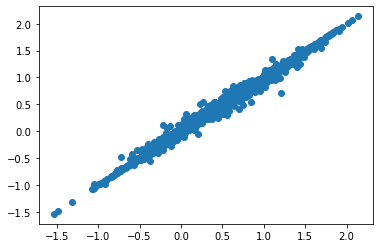

In [106]:
plt.scatter(df_sam['h_cor_med'], df_sam['h_cor_mean'])

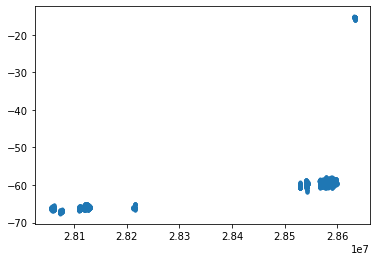

In [102]:
plt.plot(df_sam['x'], df_sam['height_mean'], '.')